## Stacked and percent barplots 

This notebook will contain examples of stakced and percent barplots created using Seaborn. Plots data used will be INE (Spanish National Institute) Spanish Office of National statistics demographic time series indicators such as total population and population by nationality as of 1st January and also by foreign population by country of birth.

In [1]:
# 1. Load required libraries
import pandas as pd
import os

We will use this website as a reference to  start creating our stakced barplots in Seaborn

<https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/>

### 1. Build path to project folder

- Get current working directory and path to project folder

In [2]:
# Get current working directory
my_wd = os.getcwd()
print("My working directory is:",my_wd)

# 1. List files in \data folder to identify Excel file to be imported into Python 
new_wd_ML_using_python = os.path.join("/home","pablo","Documents","Pablo_zorin","VS_Python_GitHub_Pablo_source","ML-using-Python")

# 2.change existing working directory to ML-using-Python folder to access Excel file located in \data folder
os.chdir(new_wd_ML_using_python)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


In [3]:
new_wd = os.getcwd()
print("Changed working directory to:",new_wd)

Changed working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


### 2. Build path to Exel file to be imported from \data sub-folder

- First we check the contents in our data folder to find Excel file to import into Python

In [ ]:
# 2.1. Build path to Exel file to be imported from \data sub-folder
data_folder = os.path.join("/home","pablo","Documents","Pablo_zorin","VS_Python_GitHub_Pablo_source","ML-using-Python",
                           'data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)



data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_2010_2024.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 2024.xlsx']


- Then we build path to Excel file we will load in Python using Pandas 

In [ ]:
# 2.2 Build  path to Excel file location
ine_population_nationality = os.path.join('data','INE total and foreign population figures Spain.xlsx')
print('ÍNE_population_nationality:',ine_population_nationality)


ÍNE_population_nationality: data/INE total and foreign population figures Spain.xlsx


### 3. Import Excel file into Python 

Get individual tab names from previous "INE total and foreign population figures Spain.xlsx" file

In [6]:
my_excel_file = pd.ExcelFile(ine_population_nationality)

my_excel_file.sheet_names  # see all sheet names

['INE_Foreign_population',
 'INE_Total_population',
 'INE_Total_foreign_population']

In [7]:
INEdata = pd.read_excel(ine_population_nationality,
                                  sheet_name = 'INE_Total_foreign_population',
                                  skiprows= 2
                                )
INEdata.head()

,Todas las edades,Total,Foreign population,% Foreign Nationals/Total population,Total YoY(N),Total YoY)(%),Foreign Nationals YoY(N),Foreign Total YoY)(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683


- Keep only first 20 rows to skip footnotes

In [8]:
INE_data_clean = INEdata.head(20)


In [9]:
INE_data_clean

,Todas las edades,Total,Foreign population,% Foreign Nationals/Total population,Total YoY(N),Total YoY)(%),Foreign Nationals YoY(N),Foreign Total YoY)(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683
5,1 de enero de 2020,47318050,5241278.0,0.110767,82748.0,0.001749,161424.0,0.030799
6,1 de enero de 2019,46918951,4850762.0,0.103386,399099.0,0.008506,390516.0,0.080506
7,1 de enero de 2018,46645070,4577322.0,0.098131,273881.0,0.005872,273440.0,0.059738
8,1 de enero de 2017,46497393,4417653.0,0.095009,147677.0,0.003176,159669.0,0.036143
9,1 de enero de 2016,46418884,4419334.0,0.095206,78509.0,0.001691,-1681.0,-0.000380


In [10]:
# Rename columns
INE_data_clean.columns = ['Date','Total_population','Foreign_population','Percent_foreign_population',
'Total population YoY(N)','Total population  YoY(%)','Foreign population YoY(N)','Foreign population  YoY(%)']

- Start by subsetting previous data set keeping initial variables (Date,Total_population,Foreign_population), used to derive the rest of columns in INE_data dataframe

In [11]:
INE_total_foreign_population = INE_data_clean[['Date','Total_population','Foreign_population']]
INE_total_foreign_population.head()

,Date,Total_population,Foreign_population
0,1 de enero de 2025,49077984,6852348.0
1,1 de enero de 2024,48619695,6502282.0
2,1 de enero de 2023,48085361,6089620.0
3,1 de enero de 2022,47486727,5509046.0
4,1 de enero de 2021,47400798,5402702.0


### 4. Create new calculated fields 

In [12]:
INE_total_foreign_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                20 non-null     object 
 1   Total_population    20 non-null     object 
 2   Foreign_population  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


#### 4.1 New year year column

I can then modify this str[] parameter from str.strip() to slice four latest characters from Date column to obtain full year in YYYY format. I need to introduce [13:] to ensure I obtain a full year on my new Year variable

In [13]:
INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[13:]
INE_total_foreign_population.head()

/tmp/ipykernel_442/2161791062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[13:]


,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021


#### 4.2 New Spanish nationals column derived from total and foreign population figures

We will compute Spanish nationals column substracting Foreign population to Total population obtaining total population split by spanish/foreign nationality

First we duplicate our original dataframe using .copy() function 

In [14]:
INE_population_nationality = INE_total_foreign_population.copy()
INE_population_nationality.head()

,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021


Then we include our new Spanish nationals calculation from substracting Foreign_population to Total_population

In [18]:
INE_population_nationality['Spanish_nationals'] = INE_population_nationality['Total_population']- INE_population_nationality['Foreign_population']
INE_population_nationality.head()

,Date,Total_population,Foreign_population,Year,Spanish_nationals
0,1 de enero de 2025,49077984,6852348.0,2025,42225636.0
1,1 de enero de 2024,48619695,6502282.0,2024,42117413.0
2,1 de enero de 2023,48085361,6089620.0,2023,41995741.0
3,1 de enero de 2022,47486727,5509046.0,2022,41977681.0
4,1 de enero de 2021,47400798,5402702.0,2021,41998096.0


We also rename previous dataframe so new one is called "INE_spain_population" as it is just Spanish population split by nationality (Spanish nationals, foreign nationals)

In [19]:
INE_spain_population = INE_population_nationality.copy()
INE_spain_population.head() 

,Date,Total_population,Foreign_population,Year,Spanish_nationals
0,1 de enero de 2025,49077984,6852348.0,2025,42225636.0
1,1 de enero de 2024,48619695,6502282.0,2024,42117413.0
2,1 de enero de 2023,48085361,6089620.0,2023,41995741.0
3,1 de enero de 2022,47486727,5509046.0,2022,41977681.0
4,1 de enero de 2021,47400798,5402702.0,2021,41998096.0


Then I only need to subset required columns before I reshape the data 

In [20]:
INE_spain_population = INE_spain_population[['Year','Total_population','Spanish_nationals','Foreign_population']]
INE_spain_population

,Year,Total_population,Spanish_nationals,Foreign_population
0,2025,49077984,42225636.0,6852348.0
1,2024,48619695,42117413.0,6502282.0
2,2023,48085361,41995741.0,6089620.0
3,2022,47486727,41977681.0,5509046.0
4,2021,47400798,41998096.0,5402702.0
5,2020,47318050,42076772.0,5241278.0
6,2019,46918951,42068189.0,4850762.0
7,2018,46645070,42067748.0,4577322.0
8,2017,46497393,42079740.0,4417653.0
9,2016,46418884,41999550.0,4419334.0


### 5. Reshape data for stacked percent barplot 

We need to reshape previous dataframe so we have Spanish national and Foreign population under the same column

In [21]:
Population_to_reshape = INE_spain_population.copy()
Population_to_reshape.head()

,Year,Total_population,Spanish_nationals,Foreign_population
0,2025,49077984,42225636.0,6852348.0
1,2024,48619695,42117413.0,6502282.0
2,2023,48085361,41995741.0,6089620.0
3,2022,47486727,41977681.0,5509046.0
4,2021,47400798,41998096.0,5402702.0


- Sorting values in ascending order by Year prior to reshaping data

In [22]:
Population_to_reshape_sorted = Population_to_reshape.sort_values(by = 'Year', ascending= True)
Population_to_reshape_sorted

,Year,Total_population,Spanish_nationals,Foreign_population
19,2006,44009969,40079053.0,3930916.0
18,2007,44784659,40335225.0,4449434.0
17,2008,45668938,40582643.0,5086295.0
16,2009,46239271,40852612.0,5386659.0
15,2010,46486621,41084042.0,5402579.0
14,2011,46667175,41354735.0,5312440.0
13,2012,46818216,41582186.0,5236030.0
12,2013,46712650,41648066.0,5064584.0
11,2014,46495744,41819392.0,4676352.0
10,2015,46425722,41971737.0,4453985.0


In [23]:
Population_to_reshape_sorted.reset_index()

,index,Year,Total_population,Spanish_nationals,Foreign_population
0,19,2006,44009969,40079053.0,3930916.0
1,18,2007,44784659,40335225.0,4449434.0
2,17,2008,45668938,40582643.0,5086295.0
3,16,2009,46239271,40852612.0,5386659.0
4,15,2010,46486621,41084042.0,5402579.0
5,14,2011,46667175,41354735.0,5312440.0
6,13,2012,46818216,41582186.0,5236030.0
7,12,2013,46712650,41648066.0,5064584.0
8,11,2014,46495744,41819392.0,4676352.0
9,10,2015,46425722,41971737.0,4453985.0


In [24]:
df_to_reshape = Population_to_reshape_sorted[['Year','Total_population','Spanish_nationals','Foreign_population']]
df_to_reshape.head()

,Year,Total_population,Spanish_nationals,Foreign_population
19,2006,44009969,40079053.0,3930916.0
18,2007,44784659,40335225.0,4449434.0
17,2008,45668938,40582643.0,5086295.0
16,2009,46239271,40852612.0,5386659.0
15,2010,46486621,41084042.0,5402579.0


In [25]:
df_to_reshape_subset = df_to_reshape[['Year','Spanish_nationals','Foreign_population']]
df_to_reshape_subset.head()

,Year,Spanish_nationals,Foreign_population
19,2006,40079053.0,3930916.0
18,2007,40335225.0,4449434.0
17,2008,40582643.0,5086295.0
16,2009,40852612.0,5386659.0
15,2010,41084042.0,5402579.0


- Now we reshape our data from wide to long using  pd.melt() method

In [26]:
population_long = pd.melt(df_to_reshape_subset, id_vars= 'Year',value_vars=['Spanish_nationals','Foreign_population'])
population_long

,Year,variable,value
0,2006,Spanish_nationals,40079053.0
1,2007,Spanish_nationals,40335225.0
2,2008,Spanish_nationals,40582643.0
3,2009,Spanish_nationals,40852612.0
4,2010,Spanish_nationals,41084042.0
5,2011,Spanish_nationals,41354735.0
6,2012,Spanish_nationals,41582186.0
7,2013,Spanish_nationals,41648066.0
8,2014,Spanish_nationals,41819392.0
9,2015,Spanish_nationals,41971737.0


Check all records displayed as rows are now displayed on a single column at the top ond bottom of the newly reshpaed long dataframe

In [27]:
population_long.head(5)

,Year,variable,value
0,2006,Spanish_nationals,40079053.0
1,2007,Spanish_nationals,40335225.0
2,2008,Spanish_nationals,40582643.0
3,2009,Spanish_nationals,40852612.0
4,2010,Spanish_nationals,41084042.0


In [28]:
population_long.tail(5)

,Year,variable,value
35,2021,Foreign_population,5402702.0
36,2022,Foreign_population,5509046.0
37,2023,Foreign_population,6089620.0
38,2024,Foreign_population,6502282.0
39,2025,Foreign_population,6852348.0


After reshaping our data we have Spanish nationals at the top and foreign population at the bottom of the newly creaetd "variable" column

- So we can rename "variable" by "nationality" that we will use later on in the seaborn stacked percent bar chart

In [29]:
population_long.columns

Index(['Year', 'variable', 'value'], dtype='object')

In [30]:
population_long.columns = ['Year','Nationality','Value']
population_long.head()

,Year,Nationality,Value
0,2006,Spanish_nationals,40079053.0
1,2007,Spanish_nationals,40335225.0
2,2008,Spanish_nationals,40582643.0
3,2009,Spanish_nationals,40852612.0
4,2010,Spanish_nationals,41084042.0


### 6. Building the Stacked Barplot using Seaborn

Load required libraries to use Seaborn

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Now that we have our data in the right shape to create a Stacked barplot, I will start building the plot and then once produced it will be saved in the "Seaborn_plots" folder as a .png file

- Check the two categories that will make the staked bar chart from Nationality column, using the unique() method.

In [32]:
population_long['Nationality'].unique()

array(['Spanish_nationals', 'Foreign_population'], dtype=object)

- Set Seaborn theme for our plot , this time we choose "darkgrid" theme

In [33]:
sns.set_theme(style = "darkgrid")

- Set figure size

In [34]:
plt.figure(figsize=(14,24))

<Figure size 1400x2400 with 0 Axes>

<Figure size 1400x2400 with 0 Axes>

### 6.1 calculation 01.  Sum of all values 

First we create a new calculated field that will sum total number of people both Spanish nationals and Foreign population.using groupby() method alongside sum() method. Also we have to reset index after each calculation (aggregation) is performed.

In [35]:
total = population_long.groupby('Year')['Value'].sum().reset_index()
total.head()

,Year,Value
0,2006,44009969.0
1,2007,44784659.0
2,2008,45668938.0
3,2009,46239271.0
4,2010,46486621.0


### 6.2 calculation 02. Spanish nationals share of total values for each year  

In [41]:
from matplotlib.ticker import ScalarFormatter

This calculation will give us for each each the percent value of Spanish nationals out of the total population.

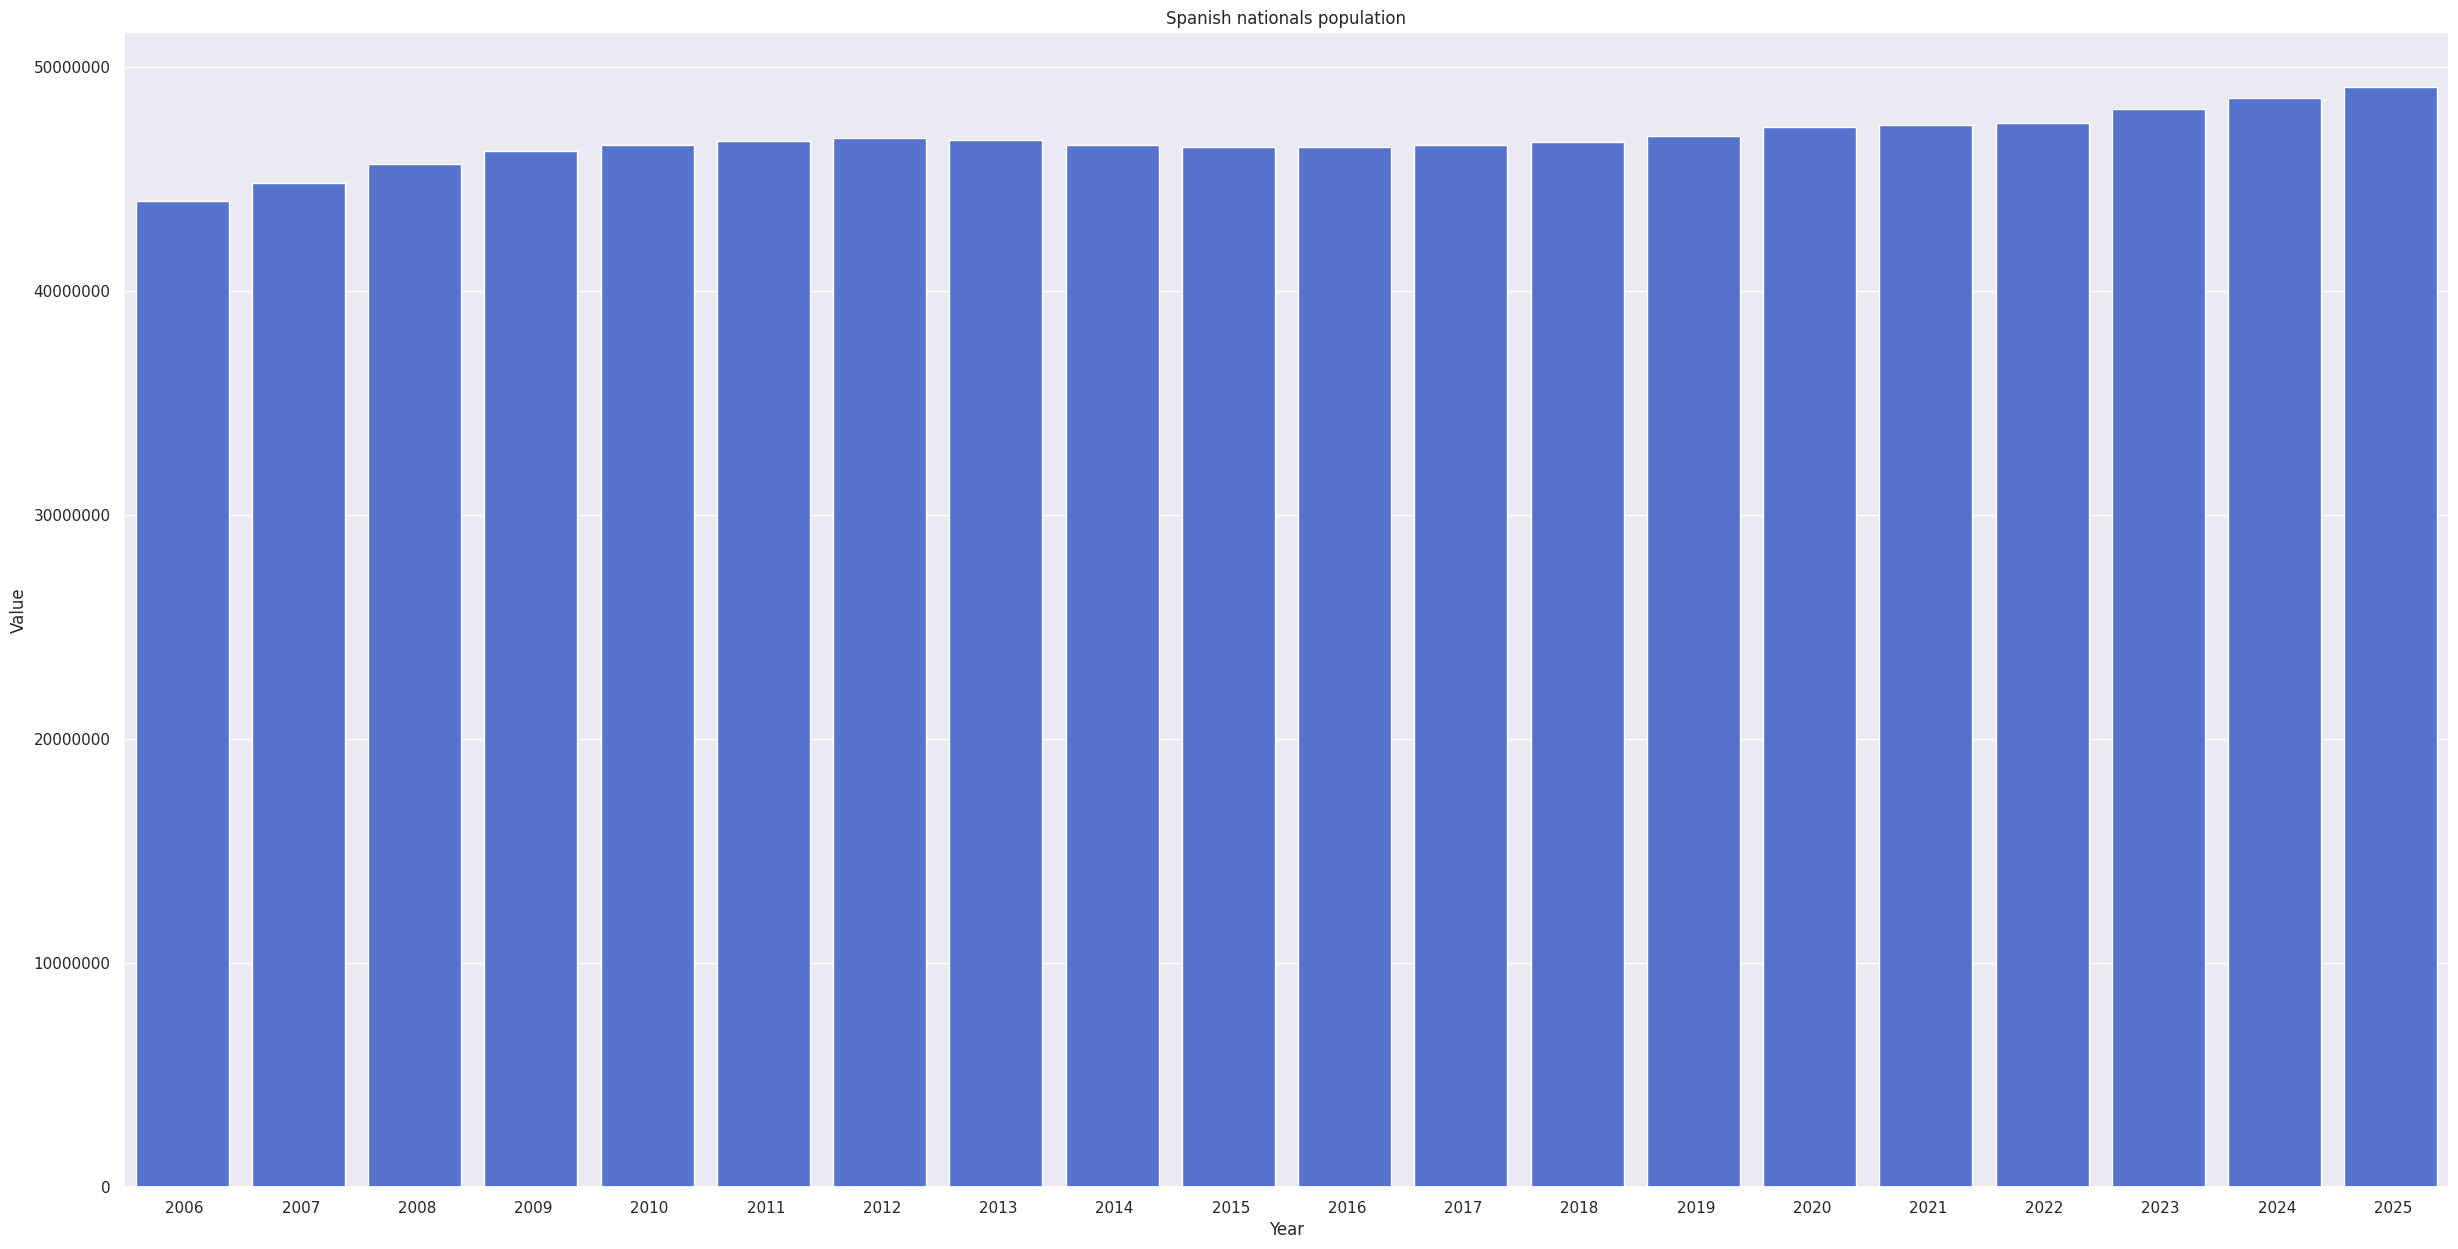

In [42]:
sns.set_theme()
fig = plt.figure(figsize=(30, 15))
axs = fig.add_subplot(1, 1, 1)
spanish_share = sns.barplot(x = "Year", y = "Value", data = total, color = 'royalblue'). set_title("Spanish nationals population")
formatter = ScalarFormatter()
formatter.set_scientific(False)
axs.yaxis.set_major_formatter(formatter)
plt.show()


- Choosing different colours for the columns used in this bar chart

In [49]:
pal01 = sns.color_palette()
pal01

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

- Then I only need to retrieve each colour as Hex codes using .as_hex() function

In [50]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


So then I can choose third green colour to be applied on my barplot above:

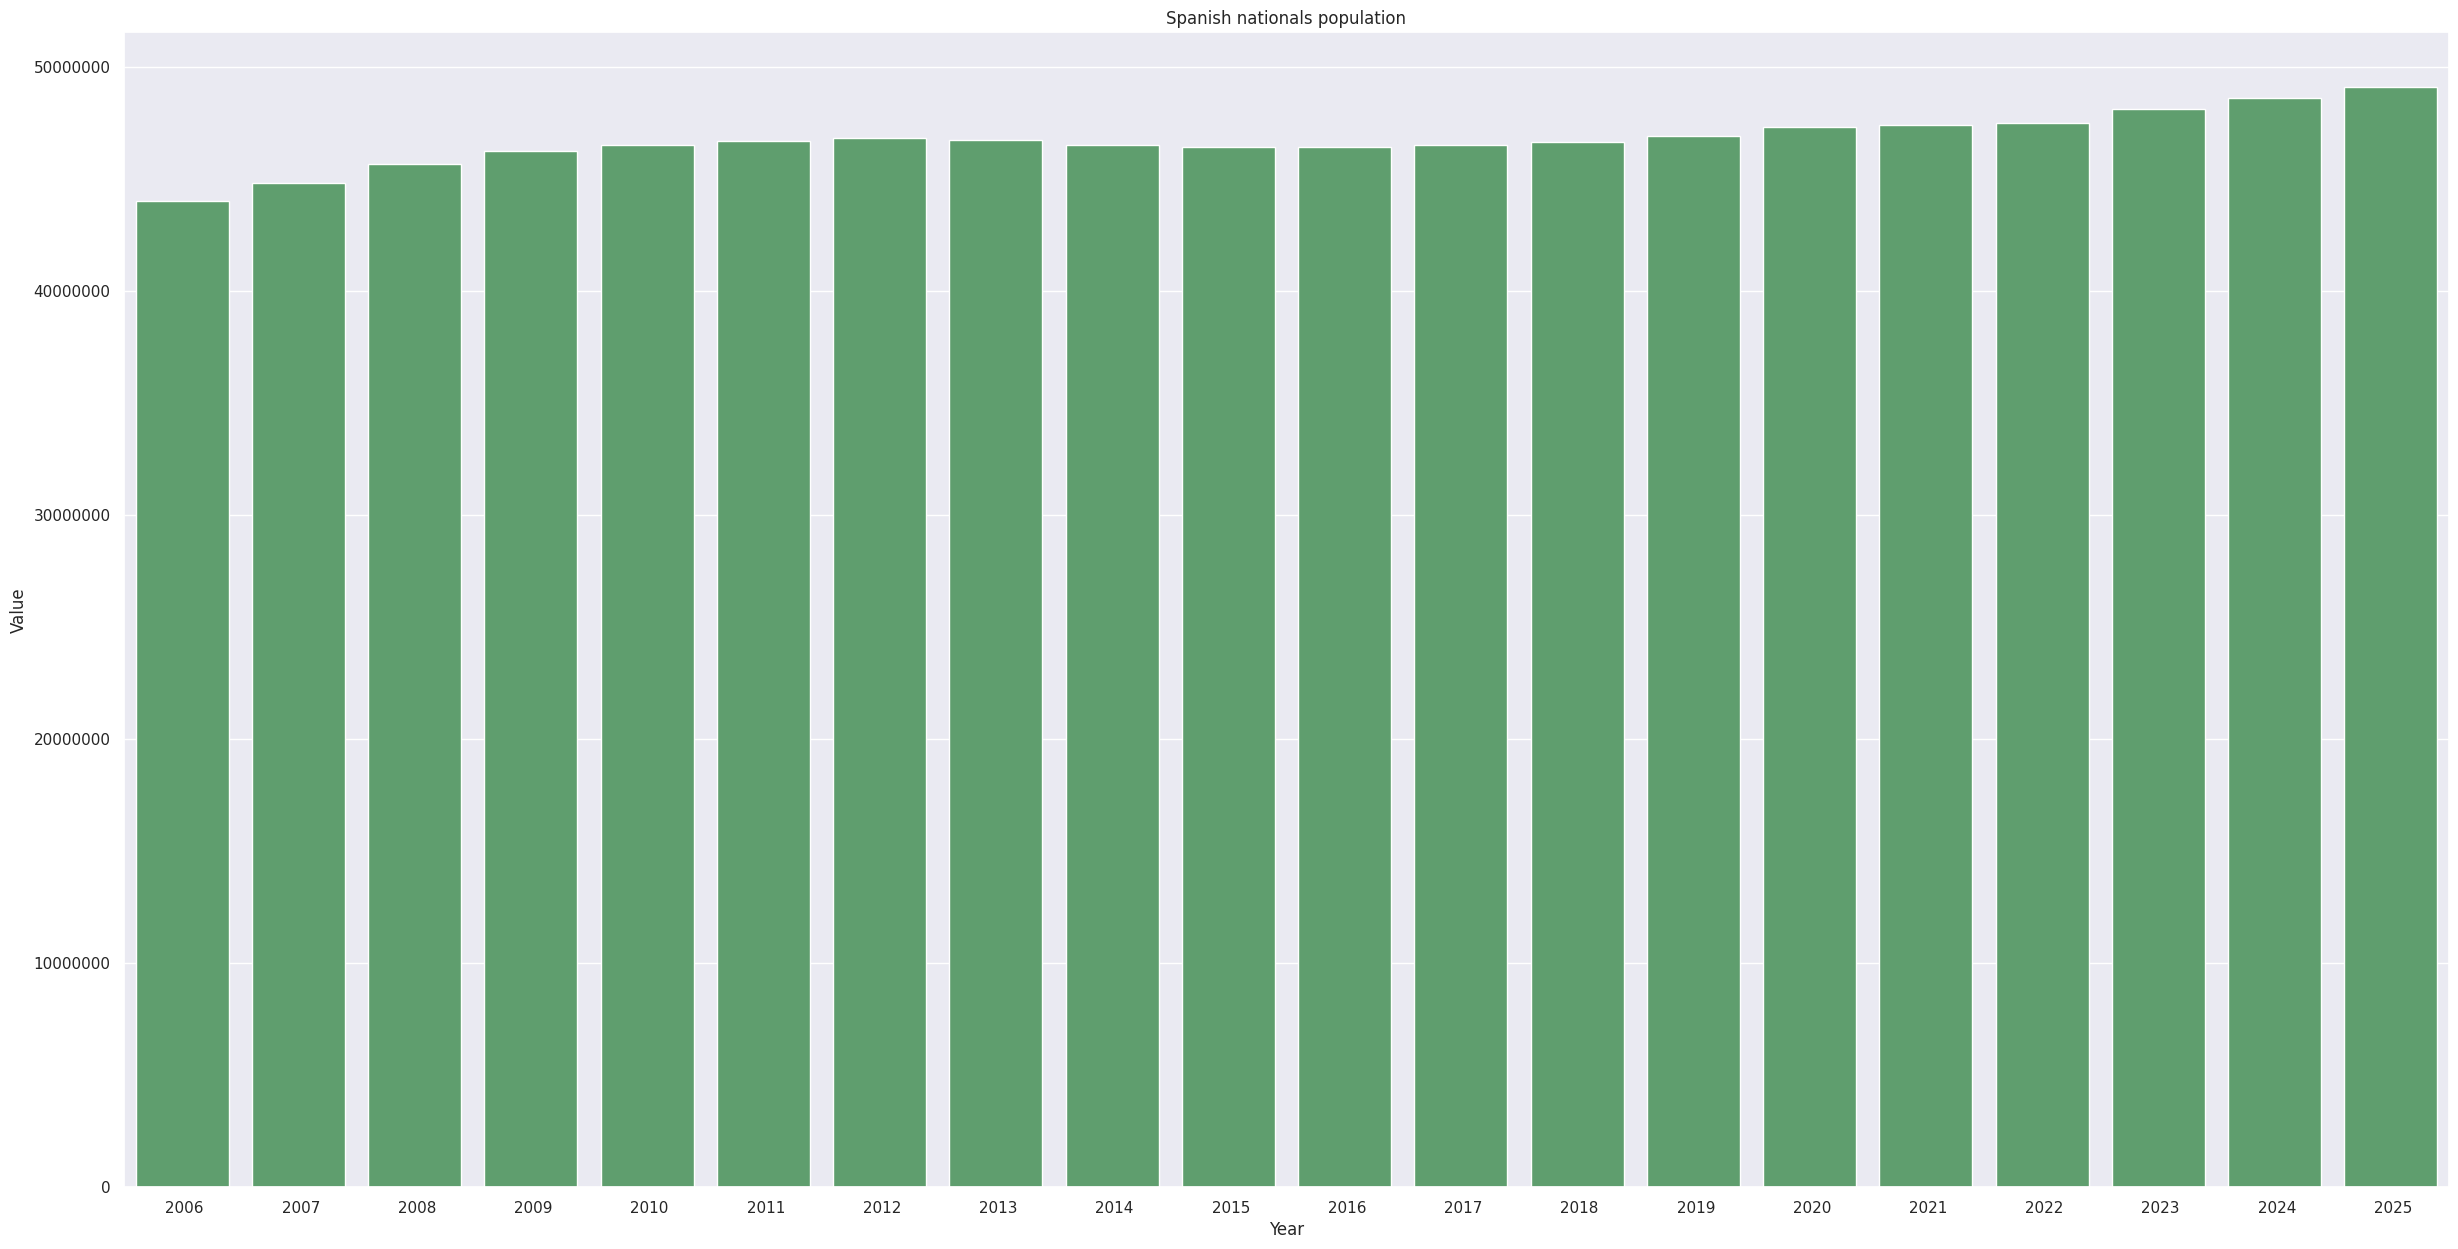

In [51]:
sns.set_theme()
fig = plt.figure(figsize=(30, 15))
axs = fig.add_subplot(1, 1, 1)
spanish_share = sns.barplot(x = "Year", y = "Value", data = total, color = '#55a868'). set_title("Spanish nationals population")
formatter = ScalarFormatter()
formatter.set_scientific(False)
axs.yaxis.set_major_formatter(formatter)
plt.show()

Or I could choose a different colour palette as this "pastel":

In [52]:
pal02 = sns.color_palette("pastel")
pal02

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [53]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


The only rule I will aply on this stacked bar plot for population by nationality is to apply two colour for the two different categories I am displaying on the same chart from the same colour palette, now that I can find each hex code for each individual colour palette colour.